# **Proyecto Telecom X**

In [5]:
import pandas as pd
!pip install --upgrade pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
import re
import json

## **Extracción**


In [7]:
datos = pd.read_json('/content/drive/MyDrive/Colab Notebooks/TelecomX_Data.json')

In [8]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


###**Normalizando el Json**

In [9]:
customer_n = pd.json_normalize(datos['customer'])
phone_n = pd.json_normalize(datos['phone'])
internet_n = pd.json_normalize(datos['internet'])
account_n = pd.json_normalize(datos['account'])

In [10]:
datos_n = pd.concat([datos[['customerID', 'Churn']], customer_n, phone_n, internet_n, account_n], axis=1)
datos_n.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
columnas = list(datos_n.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [12]:
datos_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##**Transformación**

In [13]:
datos_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
datos_n['Charges.Monthly'] = datos_n['Charges.Monthly'].astype(np.float64)

In [15]:
datos_n['Charges.Total'] = datos_n['Charges.Total'].replace(' ', np.nan)


In [16]:
datos_n['Charges.Total'] = datos_n['Charges.Total'].astype(np.float64)

In [17]:
datos_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [18]:
bin = ['Churn', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'PaperlessBilling']

In [19]:
bin

['Churn',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'PaperlessBilling']

In [20]:
datos_n[bin] = datos_n[bin].applymap(lambda x: x == 'Yes')

/tmp/ipython-input-53057634.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_n[bin] = datos_n[bin].applymap(lambda x: x == 'Yes')


In [21]:
datos_n['SeniorCitizen'] = datos_n['SeniorCitizen'].astype('bool')


In [22]:
categoricas = ['gender', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']

In [23]:
datos_n[categoricas] = datos_n[categoricas].astype('category')

In [24]:
datos_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   bool    
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   bool    
 5   Dependents        7267 non-null   bool    
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   bool    
 8   MultipleLines     7267 non-null   bool    
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [25]:
print(datos_n.isnull().sum())

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [26]:
datos_n['Charges.Total'] = datos_n['Charges.Total'].fillna(datos_n['Charges.Total'].median())

In [27]:
datos_n['Charges.Total_missing'] = datos_n['Charges.Total'].isnull()

In [28]:
print(datos_n.isnull().sum())

customerID               0
Churn                    0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
Charges.Monthly          0
Charges.Total            0
Charges.Total_missing    0
dtype: int64


In [29]:
def validar_id(id_str):
    return bool(re.match(r'^[0-9]{4}-[A-Z]{5}$', id_str))

datos_n['ID_valido'] = datos_n['customerID'].apply(validar_id)
print(f"IDs válidos encontrados: {datos_n['ID_valido'].sum()}")

IDs válidos encontrados: 7267


In [30]:
ids_invalidos = datos_n[~datos_n['ID_valido']]
print(ids_invalidos['customerID'].head(10))

Series([], Name: customerID, dtype: object)


In [31]:
datos_validos = datos_n[datos_n['ID_valido']]

In [32]:
print(datos_validos['customerID'].nunique() == len(datos_validos))

True


##**Carga y análisis**


In [33]:
datos_n.describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2279.287581
std,24.571773,30.129572,2267.178963
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,401.400000
50%,29.000000,70.300000,1391.000000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


In [34]:
datos_n[['gender', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']].describe()

,gender,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,2,3,3,3,3,3,3,3,3,4
top,Male,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3675,3198,3608,3182,3195,3582,2896,2870,4005,2445


###**Analizar variables por cada uno de los items**

In [35]:
conteo_churn = datos_n['Churn'].value_counts()
print(conteo_churn)
porcentaje_churn = datos_n['Churn'].value_counts(normalize=True) * 100
print(porcentaje_churn.round(2))

Churn
False    5398
True     1869
Name: count, dtype: int64
Churn
False    74.28
True     25.72
Name: proportion, dtype: float64


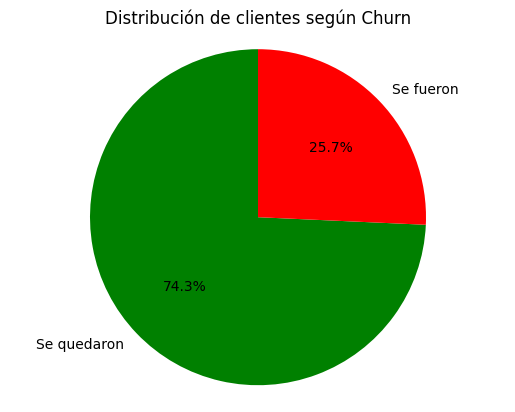

In [36]:
labels = ['Se quedaron', 'Se fueron']
sizes = datos_n['Churn'].value_counts()
colors = ['green', 'red']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de clientes según Churn')
plt.axis('equal')
plt.show()

Churn segú su género

Un gráfico de barras que muestra la cancelación según el género del cliente:
• Male (hombre)
• Female (mujer)

¿Cómo interpretarlo?
Un gráfico de barras que muestra la cancelación según el género del cliente:
Este gráfico permite observar si existen diferencias significativas en la evasión según género.

Ejemplo:
Si ambos géneros presentan tasas similares de churn, se concluye que el género no es un factor relevante para segmentar estrategias de retención.

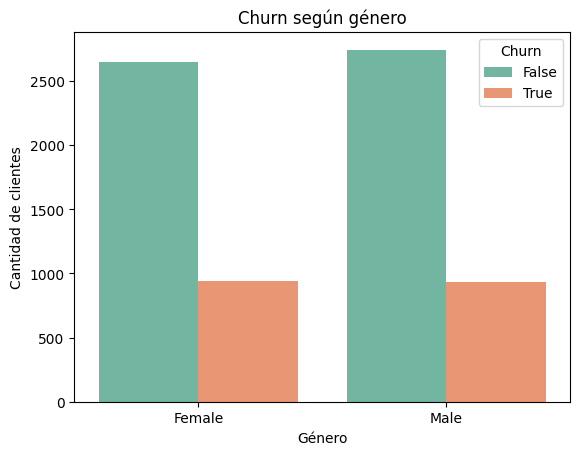

In [37]:
sns.countplot(data=datos_n, x='gender', hue='Churn', palette='Set2')
plt.title('Churn según género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.show()


Churn según si tiene pareja

Un gráfico de barras que muestra la cancelación según si el cliente tiene pareja:
• Yes (sí tiene pareja)
• No (no tiene pareja)

¿Cómo interpretarlo?
Este gráfico ayuda a identificar si el estado civil influye en la permanencia.

Ejemplo:
Si los clientes sin pareja se van más, se podría considerar ofrecer beneficios que refuercen el valor del servicio para usuarios individuales.

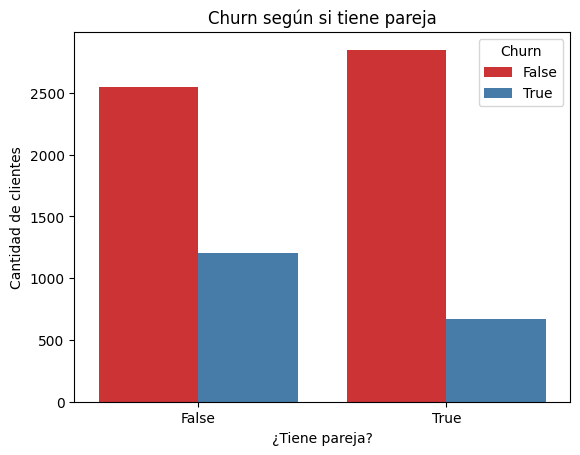

In [38]:
sns.countplot(data=datos_n, x='Partner', hue='Churn', palette='Set1')
plt.title('Churn según si tiene pareja')
plt.xlabel('¿Tiene pareja?')
plt.ylabel('Cantidad de clientes')
plt.show()



Según tipo de contrato

Un gráfico de barras que compara cuántos clientes se quedaron vs. se fueron () según el tipo de contrato que tienen:
• 	Month-to-month (mensual)
• 	One year (anual)
• 	Two year (bienal)

¿Cómo interpretarlo?
• 	Si ves que la mayoría de los que se fueron tienen contrato mensual, eso indica que los contratos cortos tienen más riesgo de cancelación.
• 	Los contratos más largos suelen tener menor churn porque implican mayor compromiso.

Ejemplo:
Si el gráfico muestra que el 60% de los clientes con contrato mensual se fueron, pero solo el 10% de los de dos años lo hicieron, entonces el tipo de contrato es un factor importante.

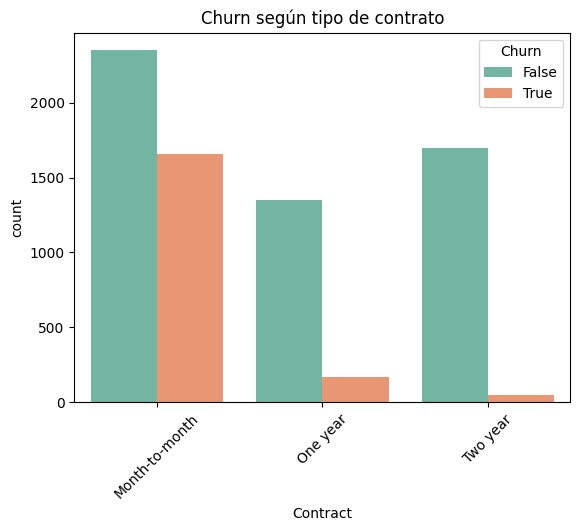

In [39]:
sns.countplot(data=datos_n, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn según tipo de contrato')
plt.xticks(rotation=45)
plt.show()



Según método de pago


Un gráfico de barras que compara el churn según cómo pagan los clientes:
• 	Electronic check
• 	Mailed check
• 	Bank transfer
• 	Credit card

¿Cómo interpretarlo?
• 	Si el churn es más alto entre quienes usan Electronic check, puede indicar que ese grupo tiene menos fidelidad o más dificultades.
• 	Métodos como Bank transfer o Credit card suelen estar asociados a clientes más estables.

Ejemplo:
Si el 40% de los que pagan con cheque electrónico se van, pero solo el 15% de los que usan tarjeta se van, eso te da una pista sobre qué métodos están asociados a mayor retención.

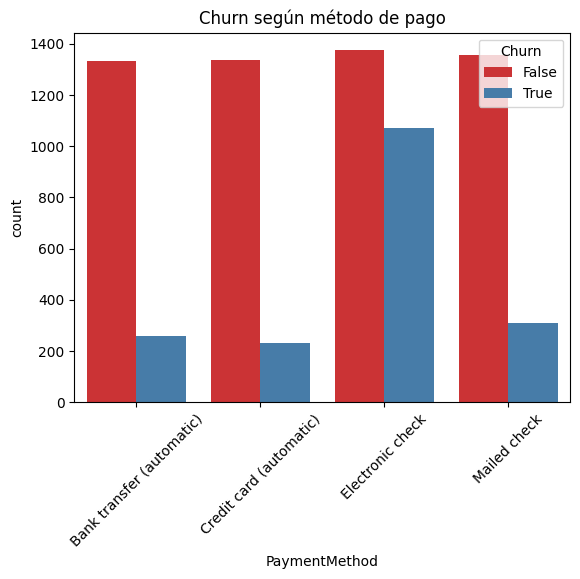

In [40]:
sns.countplot(data=datos_n, x='PaymentMethod', hue='Churn', palette='Set1')
plt.title('Churn según método de pago')
plt.xticks(rotation=45)
plt.show()



Distribución de cargos mensuales


Un histograma que compara cuánto pagan los clientes por mes (Charges.Monthly) y si se fueron o no.


¿Cómo interpretarlo?
- Si los clientes que pagan más tienden a irse, podría indicar que el precio es un factor de cancelación.
- Si no hay diferencia clara, entonces el monto mensual no influye tanto.

Ejemplo:
Si ves que los que pagan más de $90 al mes tienen mayor churn, podrías recomendar revisar los beneficios de esos planes.



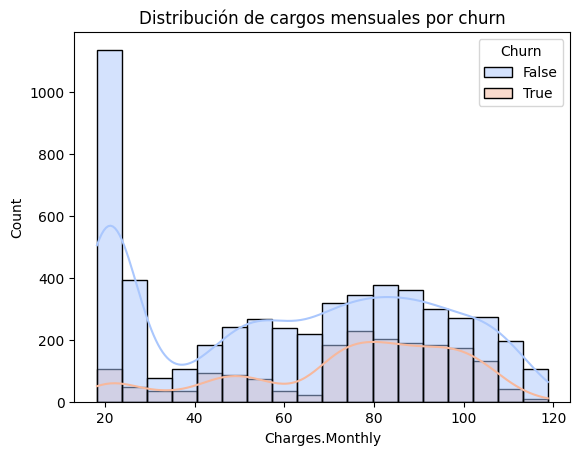

In [41]:
sns.histplot(data=datos_n, x='Charges.Monthly', hue='Churn', kde=True, palette='coolwarm')
plt.title('Distribución de cargos mensuales por churn')
plt.show()



Mapa de correlaciones


Un heatmap que muestra cómo se relacionan las variables numéricas entre sí. Los valores van de:
- +1: correlación positiva fuerte (cuando una sube, la otra también)
- −1: correlación negativa fuerte (cuando una sube, la otra baja)
- 0: sin relación


¿Cómo interpretarlo?
- Si tenure (tiempo como cliente) tiene correlación negativa con Churn, significa que los clientes más antiguos tienden a quedarse.
- Si Charges.Total y Charges.Monthly tienen alta correlación, es lógico: el total depende del mensual.

Ejemplo:
Si Churn tiene correlación de −0.4 con tenure, eso indica que a mayor antigüedad, menor probabilidad de irse.




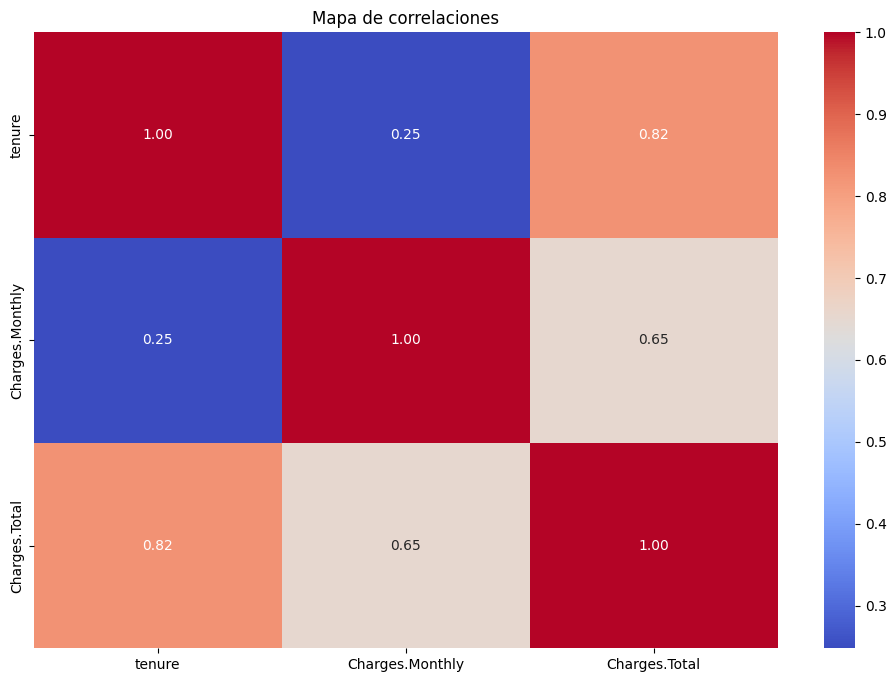

In [42]:
corr = datos_n.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlaciones')
plt.show()



Distribución de churn según antigüedad del cliente

Un histograma que muestra cuántos clientes se quedaron vs. se fueron () según su antigüedad como cliente (en meses):

¿Cómo interpretarlo?

Clientes nuevos (tenure bajo)
• 	Clientes antiguos (tenure alto)
Este gráfico permite visualizar si los clientes más antiguos tienden a quedarse.
Ejemplo:
Si el churn es alto en clientes con menos de 6 meses, pero bajo en los que llevan más de 24 meses, entonces la antigüedad es un factor protector.

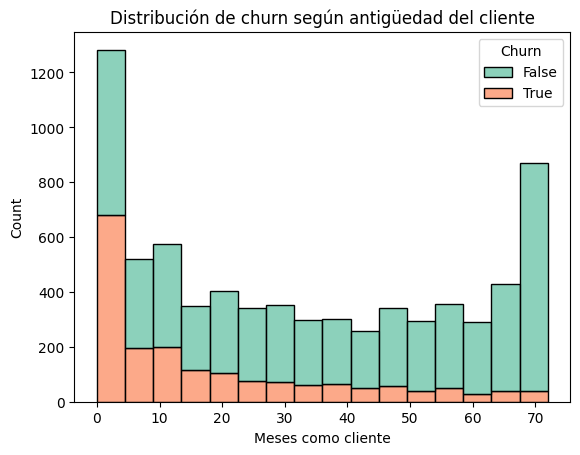

In [43]:
sns.histplot(data=datos_n, x='tenure', hue='Churn', multiple='stack', palette='Set2')
plt.title('Distribución de churn según antigüedad del cliente')
plt.xlabel('Meses como cliente')
plt.show()



Relación entre cargos mensuales y totales según churn

Un gráfico de dispersión que muestra la relación entre el cargo mensual y el total pagado por cada cliente, diferenciando si se quedaron o se fueron:

¿Cómo interpretarlo?

• 	Clientes con cargos bajos vs. altos
• 	Clientes con poco tiempo vs. mucho tiempo
Este gráfico permite ver si los clientes con cargos altos tienden a irse más.

Ejemplo:
Si los clientes que pagan más de $90 al mes tienen churn alto, podrías recomendar revisar los beneficios de esos planes.


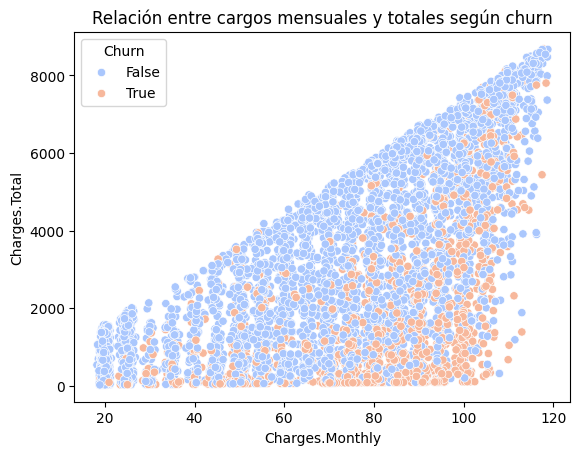

In [44]:
sns.scatterplot(data=datos_n, x='Charges.Monthly', y='Charges.Total', hue='Churn', palette='coolwarm')
plt.title('Relación entre cargos mensuales y totales según churn')
plt.show()



Churn según si tienen servicio de streaming

Un gráfico de barras que muestra cuántos clientes se quedaron vs. se fueron según si tienen contratado el servicio de TV en streaming

¿Cómo interpretarlo?

• 	Yes (sí tienen)
• 	No (no tienen)
• 	No internet service
Este gráfico permite ver si los servicios adicionales como streaming influyen en la fidelización.

Ejemplo:
Si los clientes que no tienen streaming presentan mayor churn, podrías considerar ofrecerlo como incentivo de retención.

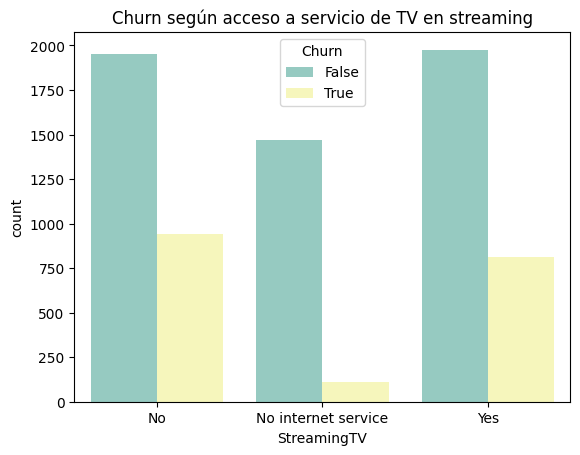

In [45]:
sns.countplot(data=datos_n, x='StreamingTV', hue='Churn', palette='Set3')
plt.title('Churn según acceso a servicio de TV en streaming')
plt.show()





Matriz de correlación entre variables numéricas


Un gráfico de calor que muestra las correlaciones entre todas las variables numéricas del conjunto

¿Cómo interpretarlo?

• 	Valores cercanos a +1: Fuerte correlación positiva. A medida que una variable aumenta, la otra también.
• 	Valores cercanos a -1: Fuerte correlación negativa. A medida que una variable aumenta, la otra disminuye.
• 	Valores cercanos a 0: Poca o ninguna relación lineal.
Este gráfico permite identificar:
• 	Variables que podrían ser redundantes (muy correlacionadas entre sí).
• 	Variables que tienen mayor relación con el churn (si está incluida en la matriz).
• 	Posibles candidatos para modelos predictivos o análisis más profundos.

Si  'Charges.Monthly' tiene alta correlación con 'Charges.Total', podrías considerar usar solo una de ellas en tu modelo para evitar multicolinealidad.
Si  'Tenure' tiene correlación negativa con 'Churn', podría indicar que los clientes más antiguos tienden a quedarse.

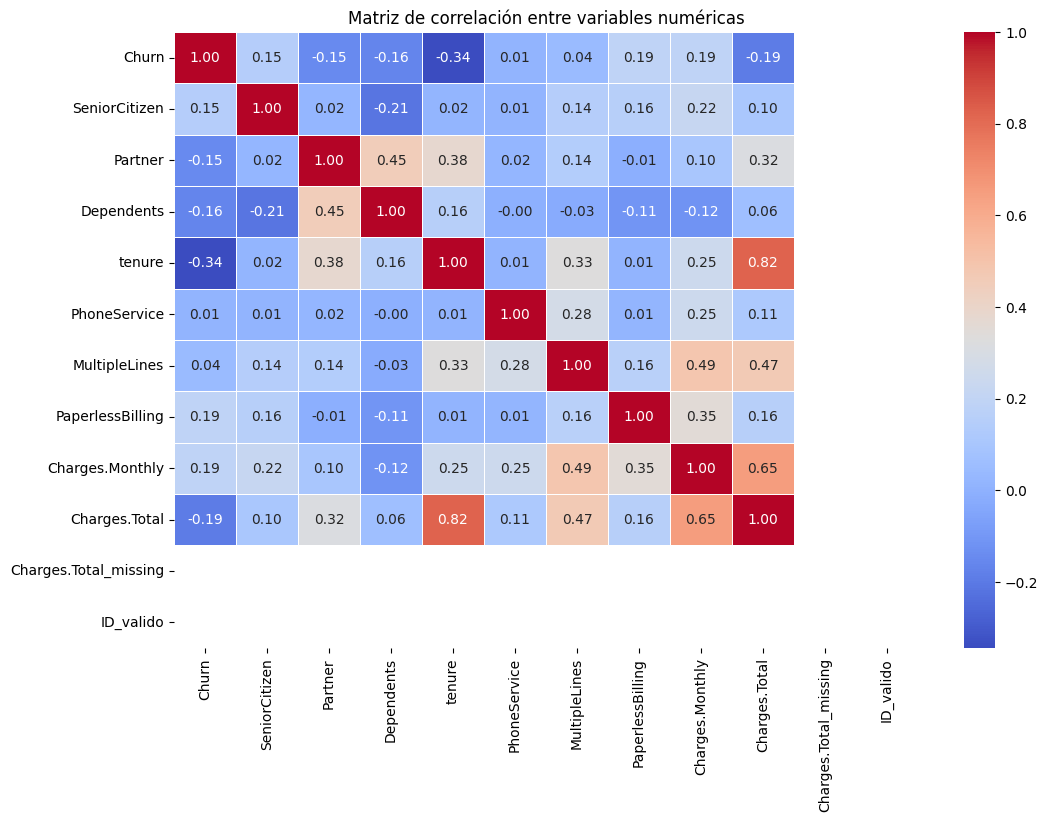

In [46]:
correlaciones = datos_n.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()



Relación entre 'Charges.Monthly' y 'Churn'


Un gráfico de dispersión que muestra cómo varía 'Churn' en función de los cargos mensuales ('Charges.Monthly') de cada cliente.

Cómo interpretarlo?

• 	El eje X representa los cargos mensuales que paga cada cliente.
• 	El eje Y representa si el cliente se fue (1) o se quedó (0).
• 	Cada punto representa un cliente, y el color indica su estado de churn.
Este gráfico permite observar si existe alguna tendencia entre el monto mensual y la probabilidad de 'Churn'.

Ejemplo de interpretación

Si notas que los clientes con cargos mensuales más altos tienden a irse más, podrías considerar:
• 	Revisar si esos planes ofrecen suficiente valor.
• 	Ofrecer descuentos o beneficios a clientes de alto gasto para mejorar la retención.
Por el contrario, si no hay una relación clara, podrías concluir que el monto mensual no es un factor determinante en la evasión.

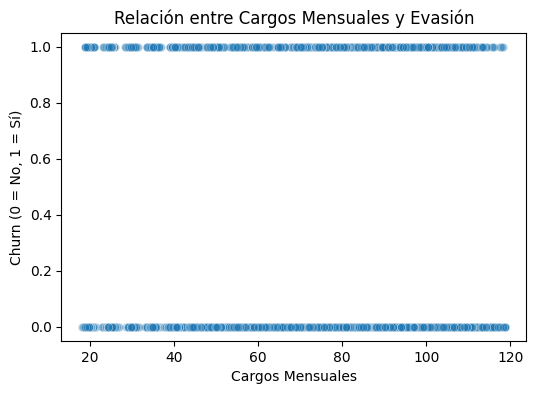

In [47]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=datos_n, x='Charges.Monthly', y='Churn', alpha=0.4)
plt.title('Relación entre Cargos Mensuales y Evasión')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Churn (0 = No, 1 = Sí)')
plt.show()

Distribución de Servicios Contratados según Churn


Un gráfico de caja que muestra cómo varía la cantidad de servicios contratados por los clientes según si se quedaron (Churn=0) o se fueron (Churn=1).

¿Cómo interpretarlo?

• 	El eje X representa el estado de churn:
•  = Cliente retenido
•  = Cliente que se fue
• 	El eje Y representa cuántos servicios adicionales tiene cada cliente (como seguridad, respaldo, streaming, etc.).
Este gráfico permite observar si los clientes que contratan más servicios tienden a quedarse más tiempo.

Ejemplo de interpretación

Si los clientes que se quedaron tienen en promedio más servicios contratados que los que se fueron, podrías considerar:
- Promover paquetes de servicios como estrategia de fidelización.
- Ofrecer beneficios por contratar múltiples servicios.
Por el contrario, si no hay diferencia significativa, podrías concluir que la cantidad de servicios no influye directamente en la evasión.


##**Informe Final**

Conclusiones e insights obtenidos

• 	Contratos mensuales presentan mayor churn
Los clientes con contrato "Month-to-month" tienen tasas de cancelación significativamente más altas que aquellos con contratos anuales o bienales.

• 	Antigüedad influye fuertemente en la retención
A mayor , menor probabilidad de churn. Los clientes nuevos (menos de 6 meses) son los más propensos a abandonar el servicio.

• 	Cargos mensuales elevados correlacionan con mayor churn
Los clientes que pagan más de $90 mensuales tienden a cancelar con mayor frecuencia, posiblemente por percepción de bajo valor.

• 	Método de pago impacta la permanencia
El churn es más alto entre quienes usan , mientras que los pagos con tarjeta o transferencia bancaria muestran mayor estabilidad.

• 	Servicios adicionales como streaming influyen positivamente
Los clientes que tienen servicios como  o  tienden a quedarse más tiempo.

• 	Clientes que se quedan contratan más servicios en promedio
La retención está asociada a una mayor cantidad de servicios contratados, lo que sugiere que el valor percibido aumenta con la integración de productos.

Recomendaciones y sugerencias estratégicas

1. 	Fomentar contratos de largo plazo
Ofrecer incentivos (descuentos, beneficios exclusivos) para migrar clientes de contratos mensuales a anuales o bienales.

2. 	Diseñar campañas de retención para clientes nuevos
Enfocar esfuerzos en los primeros 6 meses del cliente, con seguimiento personalizado y beneficios por permanencia.

3. 	Revisar estructura de precios
Evaluar si los planes con cargos mensuales altos están alineados con el valor percibido por el cliente. Considerar ajustes o agregar beneficios.

4. 	Promover métodos de pago más estables
Incentivar el uso de tarjetas de crédito o transferencias bancarias mediante promociones o facilidad de uso.

5. 	Impulsar paquetes de servicios integrados
Combinar servicios como soporte técnico, seguridad y streaming para aumentar el valor percibido y la fidelización.

6. 	Utilizar servicios adicionales como herramienta de retención
Ofrecer acceso gratuito o bonificado a servicios de entretenimiento como parte de estrategias de retención para clientes en riesgo.